In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import simps

In [9]:
sf = 200
data = pd.read_csv('/Users/willstonehouse/Desktop/CruXProject/baseline.txt', sep = ',',header = 4, usecols = [" EXG Channel 0", " EXG Channel 1"])
Data = pd.read_csv('/Users/willstonehouse/Desktop/CruXProject/binaural.txt', sep = ',',header = 4, usecols = [" EXG Channel 0", " EXG Channel 1"])


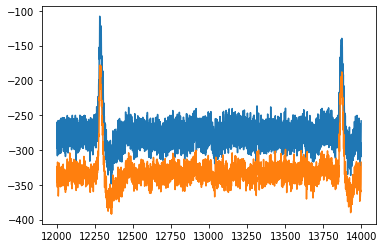

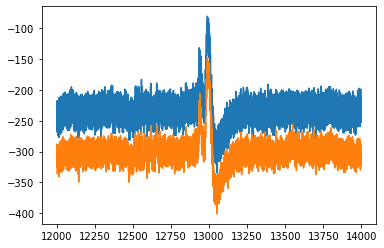

In [10]:
right = data[' EXG Channel 0']
left = data[' EXG Channel 1']

bi_right = Data[' EXG Channel 0']
bi_left = Data[' EXG Channel 1']

plt.plot(right[12000:14000])
plt.plot(left[12000:14000])
plt.show()

plt.plot(bi_right[12000:14000])
plt.plot(bi_left[12000:14000])
plt.show()

In [11]:
_right = right[68400:68600]
_left = left[68400:68600]

_bi_right = bi_right[68400:68600]
_bi_left = bi_left[68400:68600]

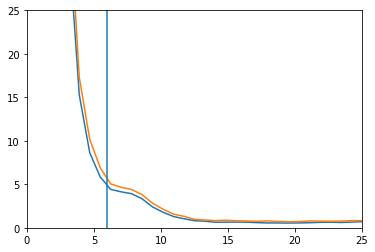

Baseline: 18.478093292771444


In [12]:
freqs, psd = signal.welch(right, fs=200)
plt.plot(freqs,psd)
freqs, psd = signal.welch(left, fs=200)
plt.plot(freqs,psd)
plt.xlim([0, 25])
plt.ylim([0, 25])
plt.axvline(x=6)
plt.show()

freq_res = freqs[1] - freqs[0]
p_idx_theta = np.logical_and(freqs >= 4, freqs <= 8)
p_theta_power = simps(psd[p_idx_theta], dx=freq_res)
print('Baseline: '+str(p_theta_power))

In [ ]:
from pyOpenBCI import OpenBCICyton
from pylsl import StreamInfo, StreamOutlet
import numpy as np

SCALE_FACTOR_EEG = (4500000)/24/(2**23-1) #uV/count
SCALE_FACTOR_AUX = 0.002 / (2**4)

print("Creating LSL stream for EEG. \nName: OpenBCIEEG\nID: OpenBCItestEEG\n")

info_eeg = StreamInfo('OpenBCIEEG', 'EEG', 8, 250, 'float32', 'OpenBCItestEEG')

print("Creating LSL stream for AUX. \nName: OpenBCIAUX\nID: OpenBCItestEEG\n")

info_aux = StreamInfo('OpenBCIAUX', 'AUX', 3, 250, 'float32', 'OpenBCItestAUX')

outlet_eeg = StreamOutlet(info_eeg)
outlet_aux = StreamOutlet(info_aux)

def lsl_streamers(sample):
    outlet_eeg.push_sample(np.array(sample.channels_data)*SCALE_FACTOR_EEG)
    outlet_aux.push_sample(np.array(sample.aux_data)*SCALE_FACTOR_AUX)

board = OpenBCICyton(port='COM5', daisy=False)

board.start_stream(lsl_streamers)

In [14]:
import pandas as pd
import numpy as np
from scipy import signal
from scipy.integrate import simps
import time
import requests

srate = 200
tlow, thigh = 4, 8

def compute_Welch(left, right):
    winlength = srate 
    nOverlap = np.round(srate/2)

    r_freqs, r_psd = signal.welch(right, fs=200)
    r_freq_res = r_freqs[1] - r_freqs[0]
    r_idx_theta = np.logical_and(r_freqs >= 4, r_freqs <= 8)
    r_theta_power = simps(r_psd[r_idx_theta], dx=r_freq_res)
    print('Theta Power Right: '+str(r_theta_power))
    
    l_freqs, l_psd = signal.welch(left, fs=200)
    l_freq_res = l_freqs[1] - l_freqs[0]
    l_idx_theta = np.logical_and(l_freqs >= 4, l_freqs <= 8)
    l_theta_power = simps(l_psd[l_idx_theta], dx=l_freq_res)
    print('Theta Power Left: '+str(l_theta_power))

    return([r_theta_power,l_theta_power])

data = pd.read_csv('/Users/willstonehouse/Desktop/CruXProject/binaural.txt', sep = ',',header = 4, usecols = [" EXG Channel 0", " EXG Channel 1"])

right = data[' EXG Channel 0']
left = data[' EXG Channel 1']

[left, right] = compute_Welch(left, right)


'''
#To simulate streaming, we update our database periodically with the values given in the sequences
request_url = "http://localhost:8010/proxy/test/"

for i in range(len(alpha_percent_change)): 
    requests.put(request_url + "alpha", json={'value': round(alpha_percent_change[i], 3)})
    requests.put(request_url + "alphaAsymmetry", json={'value': round(alpha_asymmetry[i], 3)})
    time.sleep(2)
'''

Theta Power Right: 14.522126922193616
Theta Power Left: 15.936253797069732


'\n#To simulate streaming, we update our database periodically with the values given in the sequences\nrequest_url = "http://localhost:8010/proxy/test/"\n\nfor i in range(len(alpha_percent_change)): \n    requests.put(request_url + "alpha", json={\'value\': round(alpha_percent_change[i], 3)})\n    requests.put(request_url + "alphaAsymmetry", json={\'value\': round(alpha_asymmetry[i], 3)})\n    time.sleep(2)\n'